# Binaray Classification 

In [2]:
 import tensorflow as tf
 from sklearn.datasets import make_circles
 import numpy as np
 import pandas as pd
 import matplotlib.pyplot as plt

In [3]:
n_samples = 1000
X,Y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)
pd.DataFrame(X,Y)

,0,1
1,0.754246,0.231481
1,-0.756159,0.153259
1,-0.815392,0.173282
1,-0.393731,0.692883
0,0.442208,-0.896723
...,...,...
0,0.244054,0.944125
0,-0.978655,-0.272373
1,-0.136900,-0.810012
0,0.670362,-0.767502


## Split The Data

In [4]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train, Y_test = train_test_split(X,
                                                  Y,
                                                  test_size=0.2,
                                                  random_state=42)
X_train,X_test,Y_train, Y_test = tf.cast(X_train, dtype=tf.float64) ,tf.cast(X_test, dtype=tf.float64),tf.cast(Y_train, dtype=tf.float64), tf.cast(Y_test, dtype=tf.float64)

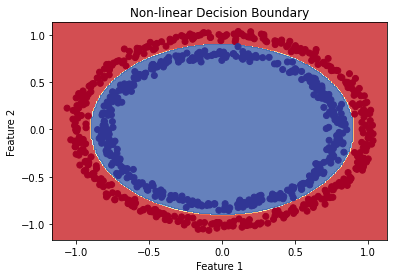

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

# Define the input data
X = np.array(X_train)

Y = np.array(Y_train)

# Create a SVM classifier with a non-linear kernel (e.g., RBF kernel)
clf = svm.SVC(kernel='rbf')

# Fit the classifier to the data
clf.fit(X, Y)

# Create a meshgrid to plot the decision boundary
h = 0.01
x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Predict the classes for each point on the meshgrid
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the input data
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.RdYlBu)

# Add labels and a title
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Non-linear Decision Boundary')

# Show the plot
plt.show()


In [5]:
X_train[:5], Y_train[:5]

(<tf.Tensor: shape=(5, 2), dtype=float64, numpy=
 array([[ 0.65794626, -0.46508097],
        [ 0.63194897, -0.7346633 ],
        [-1.00861631, -0.12403051],
        [-0.96657519, -0.22562157],
        [-0.16659009,  0.79944645]])>,
 <tf.Tensor: shape=(5,), dtype=float64, numpy=array([1., 0., 0., 0., 1.])>)

## Plot The Data

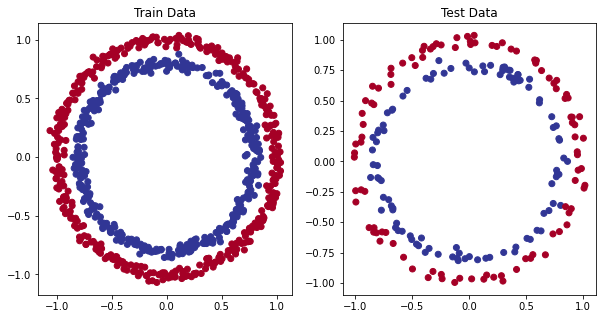

In [6]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.title("Train Data")
plt.scatter(X_train[:,0], X_train[:,1], c=Y_train, cmap=plt.cm.RdYlBu)
plt.subplot(1,2,2)
plt.title("Test Data")
plt.scatter(X_test[:,0], X_test[:,1], c=Y_test, cmap=plt.cm.RdYlBu)


In [7]:
import numpy as np

def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if model.output_shape[-1] > 1: # checks the final dimension of the model's output shape, if this is > (greater than) 1, it's multi-class 
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(np.max(y_pred, axis=1)).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

## Create The Model

In [51]:
tf.random.set_seed(42)

# create
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile
model_0.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics=['Accuracy'])

#fit
history_0 = model_0.fit(X_train,
                        Y_train,
                        epochs=10)

Epoch 1/10
25/25 [==============================] - 1s 4ms/step - loss: 0.6981 - Accuracy: 0.4800
Epoch 2/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6852 - Accuracy: 0.5375
Epoch 3/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6728 - Accuracy: 0.5675
Epoch 4/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6553 - Accuracy: 0.6137
Epoch 5/10
25/25 [==============================] - 0s 3ms/step - loss: 0.6309 - Accuracy: 0.6475
Epoch 6/10
25/25 [==============================] - 0s 3ms/step - loss: 0.5618 - Accuracy: 0.8587
Epoch 7/10
25/25 [==============================] - 0s 3ms/step - loss: 0.4519 - Accuracy: 0.9550
Epoch 8/10
25/25 [==============================] - 0s 3ms/step - loss: 0.3072 - Accuracy: 0.9862
Epoch 9/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1824 - Accuracy: 0.9950
Epoch 10/10
25/25 [==============================] - 0s 3ms/step - loss: 0.1193 - Accuracy: 0.9950


## Evaluate

In [52]:
model_0.evaluate(X_test, Y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1280 - Accuracy: 0.9950


[0.1280318796634674, 0.9950000047683716]

313/313 [==============================] - 0s 1ms/step
doing binary classifcation...
313/313 [==============================] - 0s 1ms/step
doing binary classifcation...


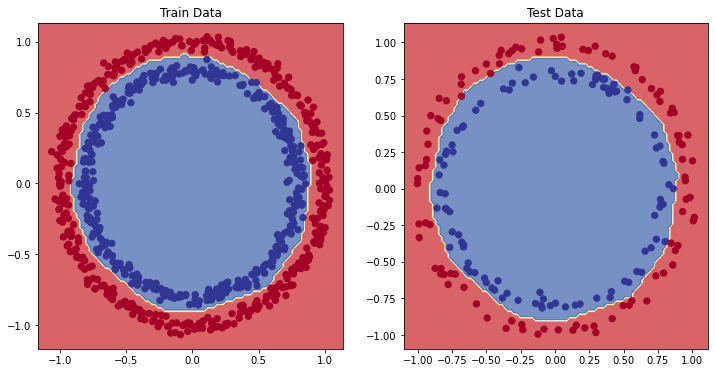

In [53]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train Data")
plot_decision_boundary(model_0,X_train.numpy(),Y_train.numpy())
plt.subplot(1,2,2)
plt.title("Test Data")
plot_decision_boundary(model_0,X_test.numpy(),Y_test.numpy())

## Multi class classification

In [54]:
def plot_loss_curves(history):

  loss = np.array(history.history["loss"])
  acc = np.array(history.history["Accuracy"])
  
  
  epochs = np.array(range(len(loss)))
  epochs

  # pd.DataFrame(history.history).plot()

  plt.plot(epochs, loss, label="Loss", c="b"),
  plt.plot(epochs, acc, label="Accuracy", c="y")
  plt.legend()

In [55]:
 epochs = np.array(range(len(history_0.history["loss"])))
 epochs


array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

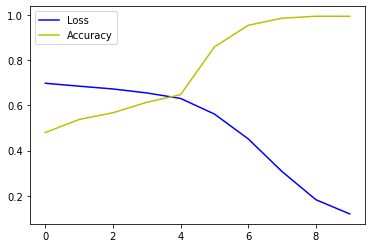

In [56]:
plot_loss_curves(history_0)

7/7 [==============================] - 0s 2ms/step


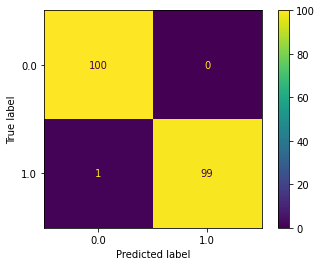

In [66]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

Y_preds = model_0.predict(X_test)
Y_preds =tf.cast(tf.squeeze( tf.round(Y_preds)), tf.float64)
cm=confusion_matrix(Y_test,Y_preds)
# dis = ConfusionMatrixDisplay.from_estimator(confusion_matrix=cm, display_labels=Y_test)
ConfusionMatrixDisplay.from_predictions(Y_test, Y_preds)
plt.plot()

plt.show()

# Multi Class

In [69]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist

## Becoming one with the data

In [71]:
fashion_mnist

<module 'keras.api._v2.keras.datasets.fashion_mnist' from '/usr/local/lib/python3.8/dist-packages/keras/api/_v2/keras/datasets/fashion_mnist/__init__.py'>

In [72]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [74]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

In [76]:
train_labels[:5]

array([9, 0, 0, 3, 0], dtype=uint8)

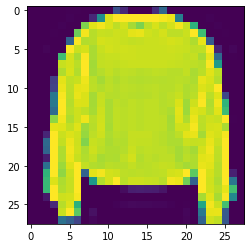

In [77]:
plt.imshow(train_data[7])

In [78]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover','Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag','Ankle boot']